# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Context

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

## Objective
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

The  idea  behind  answering  these  questions  is  to  decide  whether  the  new  page  is  effective  enough  to  gather  new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.

## Import all the necessary libraries

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [8]:
# write the code for reading the dataset abtest.csv
data = pd.read_csv(r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\DATA FILES\abtest.csv")

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [9]:
# Visualizing rows and columns of the data frame
data.head(15)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


#### Observations:
* The data frame has 6 columns which we are going to describe in the next paragraph (Data Dictionary). The data in each row corresponds to the description of a unique user_id.

### Data Dictionary
1. user_id = contains the user identification or visitor identification.

2. group = contains the group to which the users belongs. It could be control(a group of subjects to no (or standard) treatment) or treatment (a group exposed to a especific treatment or condition), according to A/B testing experiment(Practical Statistics for Data Scientist, Andrew and Peter Bruce).

3. landing_page = contains the information which tell us if the landing page is new or old.

4. time_spent_on_the_page = Time in minutes spent by the user on the landing page.

5. converted = Shows if the user gets converted to a subscriber of the news website or not.

6. language_preferred = It tells us which language has been selected by the user to visualize the landing page.

In [10]:
# displaying the shape of the data frame
data.shape

(100, 6)

In [11]:
data['user_id'].value_counts().shape

(100,)

#### Observations:

* The Dataframe has 100 rows and 6 columns.
* There are 100 unique user_id for the test.

In [12]:
# Lets check the data types in each column of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* There are a total of 100 non-null observations in each column
* The dataset contains 6 columns: 4 are object type('group', ''landing_page', 'converted', and 'language_preferred'), 1 is of integer type('user_id'), and 1 corresponds to a floating point type ('time_spent_on_the_page').
* The total memory usage is approximately 4.8 KB.
* We must try to convert the 'object format' to 'category format' as previuously done in other projects to reduce the space requiered to store the dataframe and facilitate the analysis.

In [13]:
# Converting the data from 'object' to 'category' type
data['group'] = data['group'].astype('category')
data['landing_page'] = data['landing_page'].astype('category')
data['converted'] = data['converted'].astype('category')
data['language_preferred'] = data['language_preferred'].astype('category')

In [14]:
# We validate again the information to confirm the changes in the data type and the space in memory
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
* After running again the code data.info() we can validate the change of the data type from 'object' to 'category'.
* Also, the memory usage was reduce from 4.8 to 2.6 KB, representing a reduction of 54% in memory usage.

In [15]:
# Checking the existence of missing values in the dataset
data.notnull()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
95,True,True,True,True,True,True
96,True,True,True,True,True,True
97,True,True,True,True,True,True
98,True,True,True,True,True,True


#### Observations:
* There are not missing values in the dataset

In [16]:
# Describing the statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations:
* User_id is just an identifier for each user taking part in the test.

* The time spent on the page range goes from 0.19 to 10.71 minutes, with an average time of 5.37 minutes and a standard deviation of 2.37 minutes. The time spent on the page of 75% of the users is below 7.02 minutes. This indicates that most of the users prefer spent less time during the navigation through the website.

In [17]:
categ_col=data[['group', 'landing_page', 'converted', 'language_preferred']]

#Printing number of count of each unique value in each categorical column
for column in categ_col:
    print(data[column].value_counts())
    print('-'*50)

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
new    50
old    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


#### Observations 1st outcome:
* We have the same number of sample for each group (50).
* 'Control' group (50) = group of subjects to no (or standard) treatment. 
* 'Treatment' group (50) = group exposed to a especific treatment or condition.

#### Observations 2nd outcome:
* We have the same number of users interacting with the 'new' and the 'old' website (50).
* 'new'(50) = group of users interacting with the new landing page (treatment). 
* 'old'(50) = group of users interacting with the old landing page (control).

#### Observations 3rd outcome:
* Here, we are counting the number of users who get subscribed or not in general, without looking at which specific group they belong to or any other condition.
* Numbers of user who get suscribe without looking at which specific group they belong to or any other condition = 54
* Numbers of user who DID NOT get suscribe without looking at which specific group they belong to or any other condition = 46

#### Observations 4th outcome:
* There are 3 unique preferred languages for the landing page in general, English, French, and Spanish.
* The preferred language for the users in general for the landing page without evaluating any other condition is: French 34, Spanish 34, English 32. Total = 34+34+32 = 100.


## Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    mean=data[feature].mean()
    median=data[feature].median()
    mode=data[feature].mode()
    mode_count=data[feature].mode().count()
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="seismic"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ) 
    
    # Adding the mean to the histogram
    ax_hist2.axvline(mean, color="green", linestyle="--")
    # Adding the median to the histogram
    ax_hist2.axvline(median, color="black", linestyle="-")
    # Adding the 6 modes to the histogram
    ax_hist2.axvline(mode[0], color="red", linestyle="-", label='Mode1')
    ax_hist2.axvline(mode[1], color="red", linestyle="-", label='Mode1')
    ax_hist2.axvline(mode[2], color="red", linestyle="-", label='Mode1')
    ax_hist2.axvline(mode[3], color="red", linestyle="-", label='Mode1')
    ax_hist2.axvline(mode[4], color="red", linestyle="-", label='Mode1')
    ax_hist2.axvline(mode[5], color="red", linestyle="-", label='Mode1')
    # Adding the mean of the 6 modes to the histogram
    ax_hist2.axvline(mode.mean(), color="purple", linestyle="-") 

In [19]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length ofata the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="gist_ncar", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=16, xytext=(1, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Time_spent_on_the_page

In [20]:
# Calculating the mean of the total time spent on the page regardless any other condition
print(round(data.time_spent_on_the_page.mean(), 4))

5.3778


In [21]:
# Calculating the standard deviation of the time spent on the page
round(data.time_spent_on_the_page.std(), 4)

2.3782

In [22]:
# Calculating the median of the the total time spent on the page regardless any other condition
data.time_spent_on_the_page.median()

5.415

In [23]:
# Calculating the mode of the the total time spent on the page regardless any other condition
data.time_spent_on_the_page.mode()

0    0.40
1    3.88
2    4.75
3    5.86
4    6.04
5    7.16
dtype: float64

In [24]:
# Calculating the mean of the modes
round(data['time_spent_on_the_page'].mode().mean(), 4)

4.6817

In [25]:
# Calculating percentil 0.75 to validate with the histogram boxplot
data['time_spent_on_the_page'].quantile(0.75) 

7.0225

In [26]:
# Calculating percentil 0.25 to validate with the histogram boxplot
data['time_spent_on_the_page'].quantile(0.25)

3.88

In [27]:
IQR = data['time_spent_on_the_page'].quantile(0.75)-data['time_spent_on_the_page'].quantile(0.25)
print(IQR)

3.1425


In [28]:
# Calculating maximun value to validate with the histogram boxplot
data['time_spent_on_the_page'].max()

10.71

In [29]:
# Calculating minimun value to validate with the histogram boxplot
data['time_spent_on_the_page'].min()

0.19

In [30]:
Range = data['time_spent_on_the_page'].max()-data['time_spent_on_the_page'].min()
print(round(Range, 4))

10.52


<Figure size 360x360 with 0 Axes>

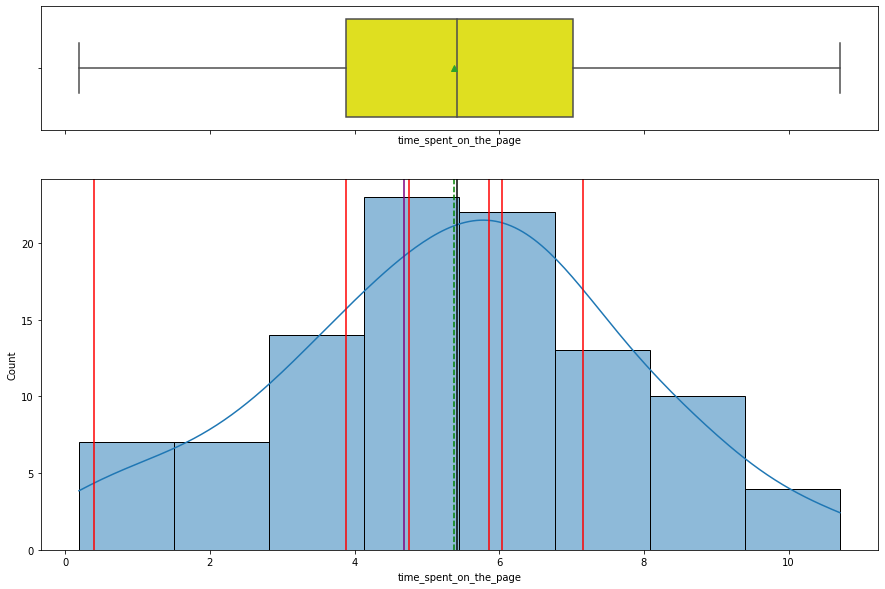

In [31]:
plt.figure(figsize=(5, 5))
histogram_boxplot(data,"time_spent_on_the_page", kde=True)

#### Observations:
* The quantile 0.75 for 'time spent on the page' is located at 7.02 minutes while the cuantile 0.25 is located at 3.88 minutes.
* The IQR is 3.14 minutes.
* The maximun value for the variable 'time spent on the page' is 10.71 minutes while the minimun value is 0.19 minutes.
* The range is 10.52 minutes.
* the mean of the 'time spent on the page" is 5.37 minutes while the median is 5.41 minutes.
* The standard deviation is 2.37 minutes.
* We have 6 modes in this variable ('time spent on the page'): 0.40, 3.88, 4.75, 5.86, 6.04, 7.16 . The mean of the modes is 4.68.
* The median, the mean, and the mean of the modes are very close to each other suggesting a normal distribucion as we can validate from the graph.

### Group

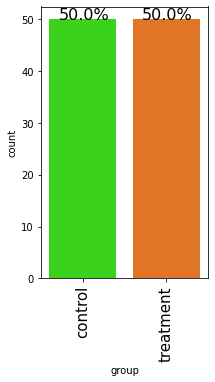

In [32]:
# Visualizing the barplot of the 'group' column
labeled_barplot(data,'group',perc = True)

#### Observations:
* We have 100 users selected as a Simple Sample Random (subset of a statistical population in which each member of the subset has an equal probability of being chosen). They were divided in two equals groups of 50 users, representing the 50% of the data each group as we can observe in the graph.
* The 'control' group was tested through the use of the 'old' landing page.
* The 'treatment'group was tested through the use of the 'new' landing page.


### Landing Page

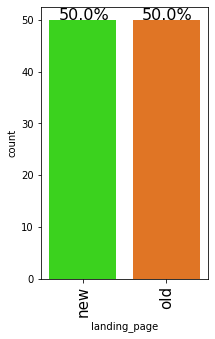

In [33]:
# Visualizing the barplot of the 'landing page' column
labeled_barplot(data, 'landing_page', perc=True)

#### Observations:
* We have 100 users selected as a Simple Sample Random (subset of a statistical population in which each member of the subset has an equal probability of being chosen). They were divided in two equals groups of 50 users, representing the 50% of the data each group as we can observe in the graph.
* The 'control' group was tested through the use of the 'old' landing page.
* The 'treatment'group was tested through the use of the 'new' landing page.

### Converted

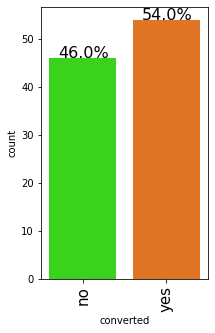

In [34]:
# Visualizing the barplot of the 'converted' column withouy evaluate any other condition
labeled_barplot(data, 'converted', perc=True)

#### Observations:
* We can say from the graph that in general 54% of the users got subscribed and 46% did not get subscribed, this without considering any other conditions.

### Preferred Language

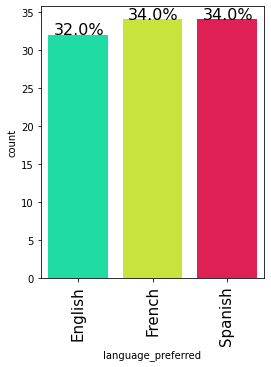

In [35]:
# Visualizing the barplot of the 'preferred_language' column without any other condition
labeled_barplot(data, 'language_preferred', perc=True)

#### Observations:
* The language preferences ('language_preferred') within the users was practically the same for the three languages, with 34% for the Spanish and French, and 32% for the English users.

In [36]:
# Creating two datasets splitting the former dataset by 'new' page and 'old' page for a further use.
data_new_page = data[data['landing_page'] == 'new'].copy()
data_old_page = data[data['landing_page'] == 'old'].copy()

In [37]:
# Displaying the first 5 rows of the new dataframe created from the new landing page users or treatment group
data_new_page.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [38]:
# Displaying the first 5 rows of the new dataframe created from the old landing page users or control group
data_old_page.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


#### Observations:
* We created two useful and differents subsets compiling the information related to the users of the new landing page(data_new_page) and the old landing page(data_old_page) for further use.

## Bivariate Analysis

### Time spent on the page vs  Landing page 

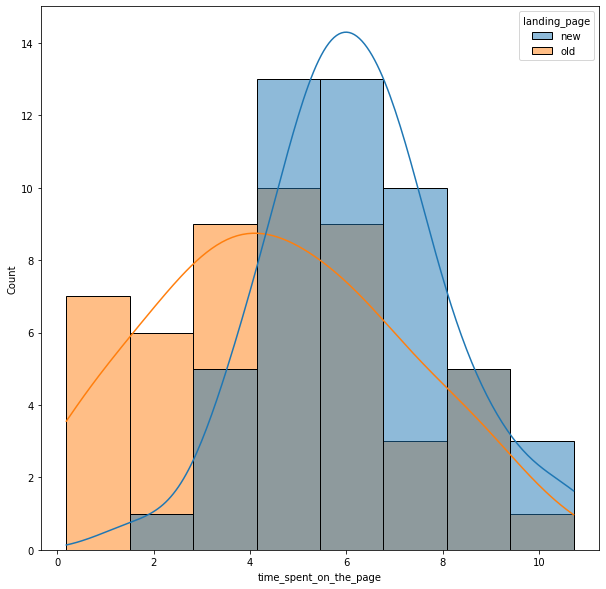

In [39]:
plt.figure(figsize=(10, 10))
sns.histplot(data = data, x = 'time_spent_on_the_page', hue = 'landing_page', kde = True)
plt.show()

In [40]:
data_new_page['time_spent_on_the_page'].mean()

6.2232

In [41]:
round(data_old_page['time_spent_on_the_page'].mean(), 4)

4.5324

#### Observations:
* The graph evaluates the time spent on the page vs the landing page version. It seems to be a correlation between the time spent and the version of the landing page. The navigation time in the new page is bigger than the users who navigated the old version of the landing page. 
* The mean navigation time of the users in the new landing (6.22 minutes) page is 27.17% greater than The mean navigation time (4.53 minutes) of the users in the old landing page. 
* The distribution in both groups seems like a normal distribution. Although, The skewness in the control group (blue) tends to be a little bit (+) positive while the skewness in the treatment group (orange) tends to zero or neutral. The kurtosis for the new version group looks like (+) positive or Leptokurtic while the old version group looks like a normal or mesokurtic.
* The mean and the median for both groups are practically together. Thus fulfilling one of the main characteristics of normal distributions
* The dispersion around the mean in the time spent data for the control group looks bigger, relatively speaking, than the dispersion around the mean of the treatment group.



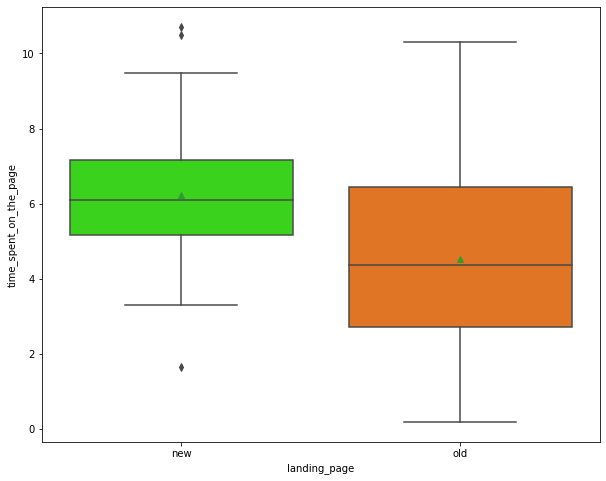

In [42]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data, showmeans=True, palette ='gist_ncar')
plt.show()

In [43]:
# Descriptive statistics for the subset concerning the new landing page data
quantile_3_new = data_new_page['time_spent_on_the_page'].quantile(0.75) 
quantile_1_new = data_new_page['time_spent_on_the_page'].quantile(0.25)
IQR_new_page = data_new_page['time_spent_on_the_page'].quantile(0.75)-data_new_page['time_spent_on_the_page'].quantile(0.25)
Range_new_page = data_new_page['time_spent_on_the_page'].max()-data_new_page['time_spent_on_the_page'].min()
max_value_new = data_new_page['time_spent_on_the_page'].max()
min_value_new = data_new_page['time_spent_on_the_page'].min()
mean_new_page_ts = data_new_page['time_spent_on_the_page'].mean()
median_new_page_ts = data_new_page['time_spent_on_the_page'].median()
sdev_new_page_ts = data_new_page['time_spent_on_the_page'].std()
mode_new_page_ts = data_new_page['time_spent_on_the_page'].mode().mean()
print('The first Q1 "0.25" of the time spent on the new page is', round(quantile_1_new, 4), 'minutes')
print('The third Q3 "0.75" of the time spent on the new page is', round(quantile_3_new, 4), 'minutes')
print('El range of the time spent on the new page is', round(Range_new_page, 4), 'minutes')
print('The IQR of the time spent on the new page is', round(IQR_new_page, 4), 'minutes')
print('El maximun value of the time spent on the new page is', round(max_value_new, 4), 'minutes')
print('El minimun value of the time spent on the new page is', round(min_value_new, 4), 'minutes')
print('The mean of the time spent on the new page is', round(mean_new_page_ts, 4), 'minutes')
print('The median of the time spent on the new page is', round(median_new_page_ts, 4), 'minutes')
print('The modes of the time spent on the new page are', '5.86 and 7.16 minutes')
print('The mean of the modes of the time spent on the new page is', round(mode_new_page_ts, 4), 'minutes')
print('The standard deviation of the of the time spent on the new page is', round(sdev_new_page_ts, 4), 'minutes')


The first Q1 "0.25" of the time spent on the new page is 5.175 minutes
The third Q3 "0.75" of the time spent on the new page is 7.16 minutes
El range of the time spent on the new page is 9.06 minutes
The IQR of the time spent on the new page is 1.985 minutes
El maximun value of the time spent on the new page is 10.71 minutes
El minimun value of the time spent on the new page is 1.65 minutes
The mean of the time spent on the new page is 6.2232 minutes
The median of the time spent on the new page is 6.105 minutes
The modes of the time spent on the new page are 5.86 and 7.16 minutes
The mean of the modes of the time spent on the new page is 6.51 minutes
The standard deviation of the of the time spent on the new page is 1.817 minutes


In [44]:
# Descriptive statistics for the subset concerning the old landing page data
quantile_3_old = data_old_page['time_spent_on_the_page'].quantile(0.75) 
quantile_1_old = data_old_page['time_spent_on_the_page'].quantile(0.25)
IQR_old_page = data_old_page['time_spent_on_the_page'].quantile(0.75)-data_old_page['time_spent_on_the_page'].quantile(0.25)
Range_old_page = data_old_page['time_spent_on_the_page'].max()-data_old_page['time_spent_on_the_page'].min()
max_value_old = data_old_page['time_spent_on_the_page'].max()
min_value_old = data_old_page['time_spent_on_the_page'].min()
mean_old_page_ts = data_old_page['time_spent_on_the_page'].mean()
median_old_page_ts = data_old_page['time_spent_on_the_page'].median()
sdev_new_page_ts = data_old_page['time_spent_on_the_page'].std()
mode_old_page_ts = data_old_page['time_spent_on_the_page'].mode().mean()
print('The Q1 quantile "0.25" of the time spent on the old page is', round(quantile_1_old, 4), 'minutes')
print('The Q3 quantile "0.75" of the time spent on the old page is', round(quantile_3_old, 4), 'minutes')
print('El range of the time spent on the old page is', round(Range_old_page, 4), 'minutes')
print('The IQR of the time spent on the old page is', round(IQR_old_page, 4), 'minutes')
print('El maximun value of the time spent on the old page is', round(max_value_old, 4), 'minutes')
print('El minimun value of the time spent on the old page is', round(min_value_old, 4), 'minutes')
print('The mean of the time spent on the old page is', round(mean_old_page_ts, 4), 'minutes')
print('The median of the time spent on the oldold page is', round(median_old_page_ts, 4), 'minutes')
print('The modes of the time spent on the oldold page are 0.40 and 6.04 minutes')
print('The mean of the modes of the time spent on the old page is', round(mode_old_page_ts, 4), 'minutes')
print('The standard deviation of the time spent on the old page is', round(sdev_new_page_ts, 4), 'minutes')

The Q1 quantile "0.25" of the time spent on the old page is 2.72 minutes
The Q3 quantile "0.75" of the time spent on the old page is 6.4425 minutes
El range of the time spent on the old page is 10.11 minutes
The IQR of the time spent on the old page is 3.7225 minutes
El maximun value of the time spent on the old page is 10.3 minutes
El minimun value of the time spent on the old page is 0.19 minutes
The mean of the time spent on the old page is 4.5324 minutes
The median of the time spent on the oldold page is 4.38 minutes
The modes of the time spent on the oldold page are 0.40 and 6.04 minutes
The mean of the modes of the time spent on the old page is 3.22 minutes
The standard deviation of the time spent on the old page is 2.582 minutes


### Time spent on the page vs Converted

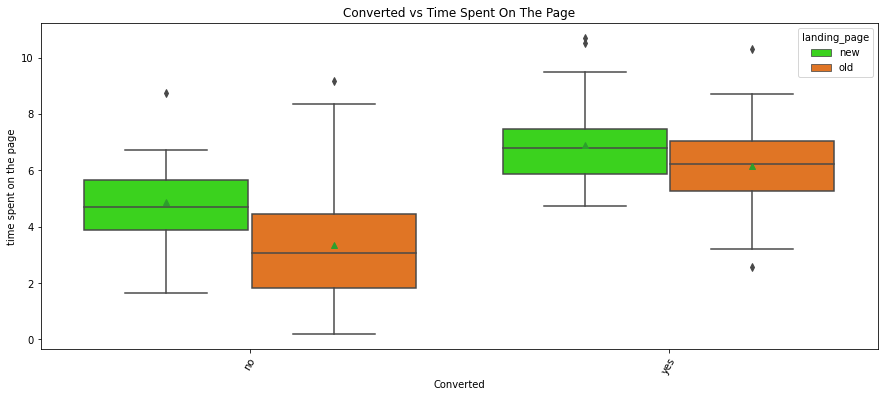

In [45]:
# Graph Time spent on the page vs Converted (yes or No)
plt.figure(figsize=(15,6))
sns.boxplot(x = "converted", y = "time_spent_on_the_page", data = data, palette = 'gist_ncar', hue = 'landing_page', showmeans=True)  
plt.xticks(rotation = 60)
plt.title("Converted vs Time Spent On The Page")
plt.ylabel("time spent on the page")
plt.xlabel("Converted")
plt.show()

#### Observations:
* The graph evaluates the time spent on the page in general vs the categorical variable 'converted'(yes/no). It seems to be a correlation between the time spent by the users who get subscribed. The mean navigation time for the users who get suscribed is greater the users who did not get subscribed in general. 
* Evaluating just the users who got subscribe through both version, we can see that the mean navigation time is a little bit higher in the new version. Although, the dispersion from the mean and the quantiles (Q1, Q3) are very similar. The mean and the median are very close to each other. The minimun time of navigation belong to the old version while in the opposite case the maximun time belongs to the new version of the landing page.
* In the opposite case, the user who did not get susbcribed in both versions, the mean navigation time of the new version of the landing page is also higher than the old version, but in this case the dispersion of the data from the mean is greater in the old version. Additionally, the maximun and the minimun navigation time belongs to the old version. 
* In all the cases the mean and the median are practically equal centered and the and the symmetry is evident so we can intuir a normal distribution.

### Time spent on the new page vs Converted (by languages)

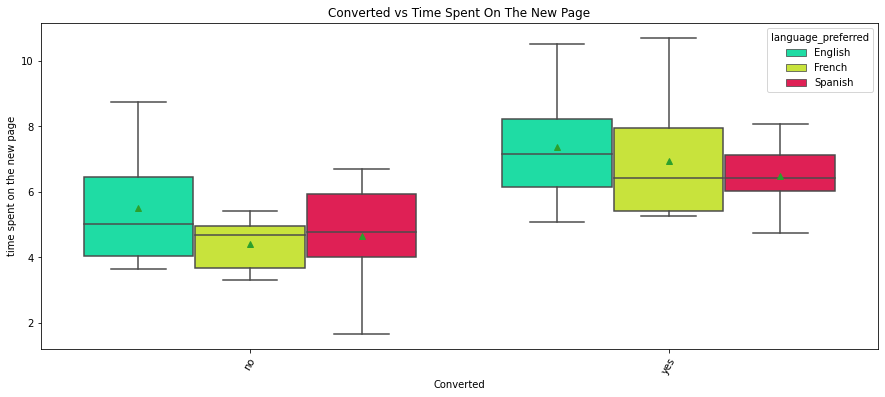

In [46]:
# Graph time spent on the new page vs converted by languages to evaluate how is the variation within it
plt.figure(figsize=(15,6))
sns.boxplot(x = "converted", y = "time_spent_on_the_page", data = data_new_page, palette = 'gist_ncar', hue = 'language_preferred', showmeans=True)  
plt.xticks(rotation = 60)
plt.title("Converted vs Time Spent On The New Page")
plt.ylabel("time spent on the new page")
plt.xlabel("Converted")
plt.show()

#### Observations:
* The graph evaluates the time spent on the NEW page vs the categorical variable 'converted'(yes/no) separated by languages. As we have deduced from the previous graphs, here we are observing the same pattern, the mean of the time spent by the users who get subscribed is greater than the mean of the time spent by the users who did not get subscribed in all the three languages. 
* Evaluating just the users who got subscribe, we can see that the mean navigation time is higher in the English version, followed by the French and the Spanish version. The Maximun navigation time belongs to the French version and the minimun to the Spanish version. The IQR is greater in the French version as well, and the lower IQR corresponds to the Spanish version. The median is equal for the French and Soanish version. The mean is very close to the median in the English and Spanish version.
* In the opposite case, the user who did not get susbcribed in the three the languages, we can see that the mean navigation time is higher in the English version as well, followed by the Spanish and the French version. The Maximun navigation time belongs to the English version and the minimun to the Spanish version in this case too. The IQR is greater in the English version, and the lower IQR corresponds to the French version. The median is practically equal for the French and Spanish version. The mean is very close to the median in the Spanish and French version. 

### Time spent on the old page vs Converted (by languages)

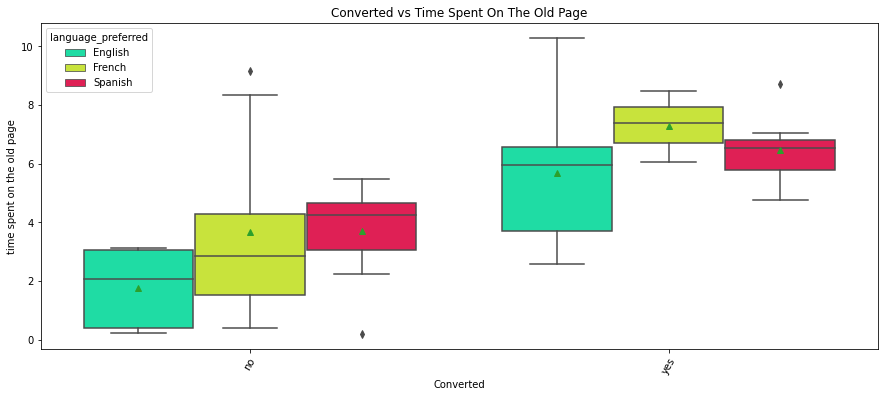

In [47]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "converted", y = "time_spent_on_the_page", data = data_old_page, palette = 'gist_ncar', hue = 'language_preferred', showmeans=True)  
plt.xticks(rotation = 60)
plt.title("Converted vs Time Spent On The Old Page")
plt.ylabel("time spent on the old page")
plt.xlabel("Converted")
plt.show()

#### Observations:
* The graph evaluates the time spent on the OLD page vs the categorical variable 'converted'(yes/no) separated by languages. As we have deduced from the previous graphs, here we are observing the same pattern, the mean of the time spent by the users who get subscribed is greater than the mean of the time spent by the users who did not get subscribed in all the three languages. 
* Evaluating just the users who got subscribe, we can see that the mean navigation time is higher in the French version, followed by the Spanish and the English version. The maximun and the minimun mean of the navigation time belongs to the English version. The IQR is greater as well in the English version, and the lower IQR corresponds to the Spanish version. The median is totally different for each version. The mean is very close to the median in the Spanish and French version.
* In the opposite case, the user who did not get susbcribed in the three the languages, we can see that the mean navigation time is higher in the Spanish version, followed by the French and the English version. The Maximun navigation time belongs to the French version and the minimun to the English version. The IQR seems to similar in the English and French version, and the lower IQR corresponds to the Spanish version. The median is variable for the three languages. The mean is very close to the median just in the English version. 

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

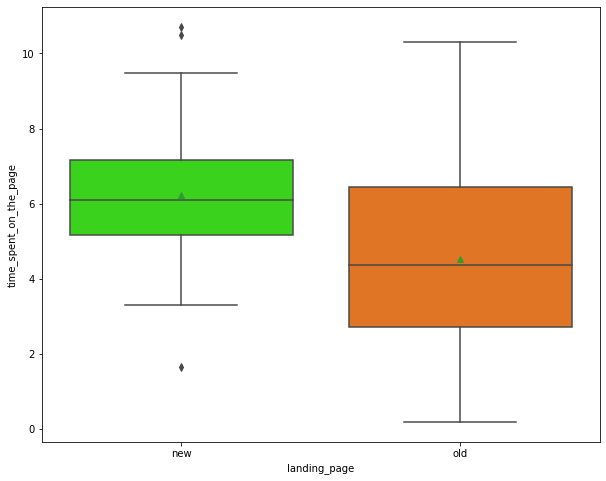

In [48]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data, showmeans=True, palette = 'gist_ncar')
plt.show()

#### Observations New Page:
* The first Q1 "0.25" of the time spent on the new page is 5.175 minutes
* The third Q3 "0.75" of the time spent on the new page is 7.16 minutes
* El range of the time spent on the new page is 9.06 minutes
* The IQR of the time spent on the new page is 1.985 minutes
* El maximun value of the time spent on the new page is 10.71 minutes
* El minimun value of the time spent on the new page is 1.65 minutes
* The mean of the time spent on the new page is 6.2232 minutes
* The median of the time spent on the new page is 6.105 minutes
* The modes of the time spent on the new page are 5.86 and 7.16 minutes
* The mean of the modes of the time spent on the new page is 6.51 minutes
* The standard deviation of the of the time spent on the new page is 1.817 minutes

#### Observations Old Page:
* The Q1 quantile "0.25" of the time spent on the old page is 2.72 minutes
* The Q3 quantile "0.75" of the time spent on the old page is 6.4425 minutes
* El range of the time spent on the old page is 10.11 minutes
* The IQR of the time spent on the old page is 3.7225 minutes
* El maximun value of the time spent on the old page is 10.3 minutes
* El minimun value of the time spent on the old page is 0.19 minutes
* The mean of the time spent on the old page is 4.5324 minutes
* The median of the time spent on the oldold page is 4.38 minutes
* The modes of the time spent on the oldold page are 0.40 and 6.04 minutes
* The mean of the modes of the time spent on the old page is 3.22 minutes
* The standard deviation of the time spent on the old page is 2.582 minutes

#### General observations:
* The graph evaluates the time spent on the page vs the landing page version. It seems to be a correlation between the time spent and the version of the landing page (new/old). The mean of navigation time in the new page is greater than the mean of the time spent by the users who navigated the old version of the landing page. 
* According to all the statistical values extracted we can conclude the main differences between the old and the new version regarding the time spent for the users in general are:

* 1.-Old version has the higher dispersion from the mean
* 2.-Old version has the lower minimun values of navigation
* 3.-Old version has a higher IQR
* 4.-Old version has the greatest standard deviation (2.58 minutes)

* The new version shows a greater engagement according to the navigation time spent by the users than the old version. This behavior is possibly associated with the improvement in the new version of two fundamental concepts within the world of websites and APPs, such as the user experience and the user interface (UX / UI).

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean of the time spent on the new landing page is equal to the mean of the time spent on the old landing page.

$H_a:$ The mean of the time spent on the new landing page is greater than the mean of the time spent on the old landing page.

Let $\mu_1$ and $\mu_2$ be the mean of the time spent on the new landing page and the mean of the time spent on the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2 $

$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

* One-tailed test case ('greater than').  We have two independent populations and we want to know the two population means. Additonally, we don't know the standard deviations of the populations.

* We know that the data is Univariate, continuos, and Normal.

* According to the conditions of the problem and the flowchart, we have to implement a "2 Sample Independent T-test".

### Step 3: Decide the significance level

* As stated in the header we must consider a significance level of 0.05 for all tests.

### Step 4: Collect and prepare data

In [49]:
# As the input for the next step, we take the previous dataset created (data_new_page) related to the new page users, and we create a new variable just with the column 'time spent on the page' of the new page.
Newpage_time = data_new_page['time_spent_on_the_page']
Newpage_time.head()

1     7.13
2     4.40
4     4.75
6     5.25
8    10.71
Name: time_spent_on_the_page, dtype: float64

In [50]:
# As the input for the next step, we take the previous dataset created (data_old_page) related to the old page users, and we create a new variable just with the column 'time spent on the page' of the old page.
Oldpage_time = data_old_page['time_spent_on_the_page']
Oldpage_time.head()

0    3.48
3    3.02
5    5.28
7    6.53
9    2.08
Name: time_spent_on_the_page, dtype: float64

In [51]:
# Mean of the time spent new page
Newpage_time.mean()

6.2232

In [52]:
# Standard deviation new page
round(Newpage_time.std(), 4)

1.817

In [53]:
# Mean of the time spent old page
round(Oldpage_time.mean(), 4)

4.5324

In [54]:
# Standard deviation old page
round(Oldpage_time.std(), 4)

2.582

#### Observations:
* The mean of the sample for the time spent on the new page is 6.2232 minutes.
* The mean of the sample for the time spent on the old page is 4.5324 minutes.
* The standard deviation of the sample for the time spent on the new page is 1.817 minutes.
* The standard deviation of the sample for the time spent on the old page is 2.582 minutes.

### Step 5: Calculate the p-value

In [55]:
# Importing the library to run the 2 Sample Independent T-test (ttest_ind)
# calculating the p-value from the new variables created (Newpage_time, Oldpage_time)
from scipy.stats import ttest_ind
test_stat, p_value =  ttest_ind(Newpage_time, Oldpage_time, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [56]:
# printing the decision based on the outcome of the p-value against the significance level
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

* We have enough statistical evidence to reject the null hyphotesis and say that the mean of the time spent on the new landing page is greater than the mean of the time spent on the old landing page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

In [57]:
# Validating the number of converted on the new page
data_new_page.groupby(by = ['landing_page','converted'])['user_id'].count()

landing_page  converted
new           no           17
              yes          33
old           no            0
              yes           0
Name: user_id, dtype: int64

In [58]:
# Validating the number of converted on the old page
data_old_page.groupby(by = ['landing_page','converted'])['user_id'].count()

landing_page  converted
new           no            0
              yes           0
old           no           29
              yes          21
Name: user_id, dtype: int64

In [59]:
# Number of 'yes' in the new landing page
converted_new_page = data_new_page[data_new_page['converted'] == 'yes']['user_id'].count()
converted_new_page

33

In [60]:
# Number of 'yes' in the old landing page
converted_old_page = data_old_page[data_old_page['converted'] == 'yes']['user_id'].count()
converted_old_page

21

In [61]:
 # total number of users in the treatment group
num_sample_new = data_new_page.group.value_counts()['treatment']
num_sample_new 

50

In [62]:
# total number of users in the control group
num_sample_old = data_old_page.group.value_counts()['control'] 
num_sample_old

50

In [63]:
# Calculating the conversion rate for the new page
conver_rate_new = converted_new_page/num_sample_new * 100
conver_rate_new

66.0

In [64]:
# Calculating the conversion rate for the old page
conver_rate_old = converted_old_page/num_sample_old * 100
conver_rate_old

42.0

In [65]:
# Creating a dataframe with version of the landing page and the conversion rate calculated for each version, as the input for thenext barplot
df_converted_new_vs_old = pd.DataFrame([['new', conver_rate_new], ['old', conver_rate_old]], columns=['landing_page', 'conversion_rate'])
df_converted_new_vs_old

,landing_page,conversion_rate
0,new,66.0
1,old,42.0


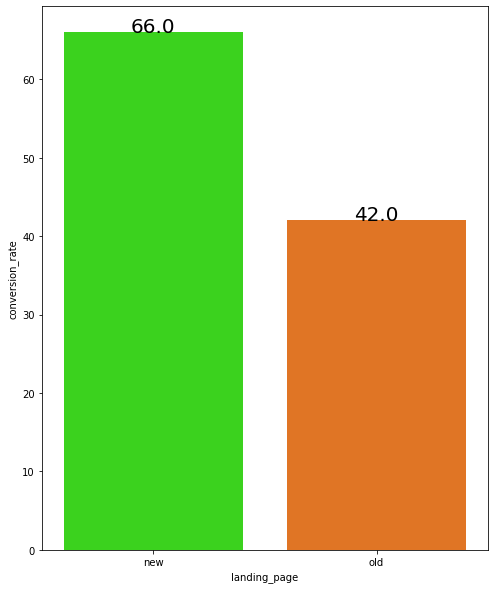

In [66]:
# Barplot of the conversion rate for each version
plt.figure(figsize=(8,10))
h = sns.barplot(data=df_converted_new_vs_old,
               x='landing_page', 
               y='conversion_rate', 
               palette='gist_ncar',
               )
for index, row in df_converted_new_vs_old.iterrows():
    h.text(row.name, row.conversion_rate, round(row.conversion_rate, 1), color='black', ha="center", size = 20)
               

### Akansha's solution for this problem

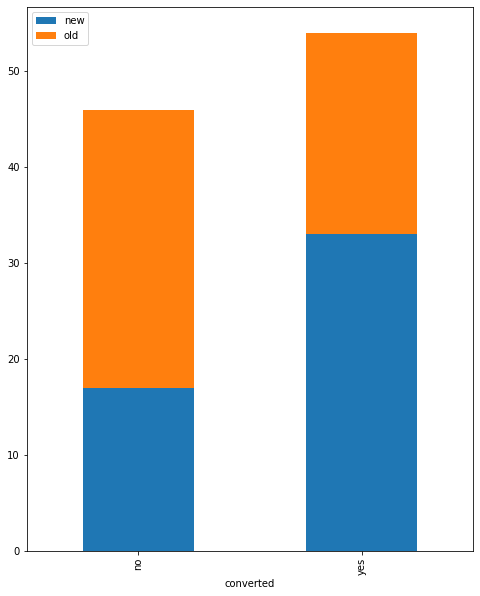

In [71]:
# visual analysis of the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(data['converted'], data['landing_page']).plot(kind="bar", figsize=(8,10), stacked=True)
plt.legend()
plt.show()

#### Observations:
* The conversion rate for the new landing page is greater than the conversion rate for the old landing page.
* The conversion rate for the new landing page is 66%.
* The conversion rate for the old landing page is 42%.
* The process or the consumer journey inside the new landing page is evidently more effective to get more subscribers than the old landing page.

### Step 1: Define the null and alternate hypotheses

$H_0:$ The conversion rate on the new landing page is equal to the conversion rate on the old landing page.

$H_a:$ The conversion rate of the new landing page is greater than the conversion rate of the old landing page.

Let $p_1$ and $p_2$ be the proportions of the new landing page and the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: p_1 = p_2 $

$H_a: p_1 > p_2 $

### Step 2: Select Appropriate test

* One-tailed test case ('greater than'). The formulated hypothesis are related with two(2) population proportions from two independent populations.
* We shall use a two(2) proportion Z test.

### Step 3: Decide the significance level

* As stated in the header we must consider a significance level of 0.05 for all tests.

### Step 4: Collect and prepare data

In [371]:
# Insurance case example(female_smokers, male_smokers)
# We use again the code used previuosly to determine the number of converted users in the treatment group
converted_new_page = data_new_page[data_new_page['converted'] == 'yes']['user_id'].count()
# We use again the code used previuosly to determine the number of converted users in the control group
converted_old_page = data_old_page[data_old_page['converted'] == 'yes']['user_id'].count()

# total number of users in the treatment group
n_control = data_new_page.group.value_counts()['treatment']
# total number of users in the control group
n_treatment = data_old_page.group.value_counts()['control'] 
print('The numbers of users of the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p_value

In [508]:
# importing the function required for the 2 proportion ztest
from statsmodels.stats.proportion import proportions_ztest  
# We have to set the efective number of items in the sample ([users converted on the new page, users converted on the old page])
efective_items = np.array([33, 21])
# We have to set the total number of the sample
observations_number = np.array([50, 50])
# Substituting the variables created in the p-value calculation formula
test_stat, p_value = proportions_ztest(efective_items, observations_number, alternative ='larger')
print('The p-value is', round(p_value, 4))

The p-value is 0.008


### Step 6: Compare the p-value with $\alpha$

In [374]:
# printing the comparison of the p-value against the significance value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

* We have enough statistical evidence to reject the null Hypothesis so we can say that the proportion of conversion rate of the new  landing page is greater than the old one. 
* Also, we can say that the new landing page is more effctive to gain subscribers than the old landing page, possibly due to the improvement in the consumer journey.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform visual analysis (based on 'converted status')

In [492]:
# Checking all the values related to the converted status 
data.groupby(by = ['landing_page','converted'])['language_preferred'].value_counts()

landing_page  converted  language_preferred
new           no         English                6
                         Spanish                6
                         French                 5
              yes        French                12
                         Spanish               11
                         English               10
old           no         French                14
                         Spanish               10
                         English                5
              yes        English               11
                         Spanish                7
                         French                 3
Name: language_preferred, dtype: int64

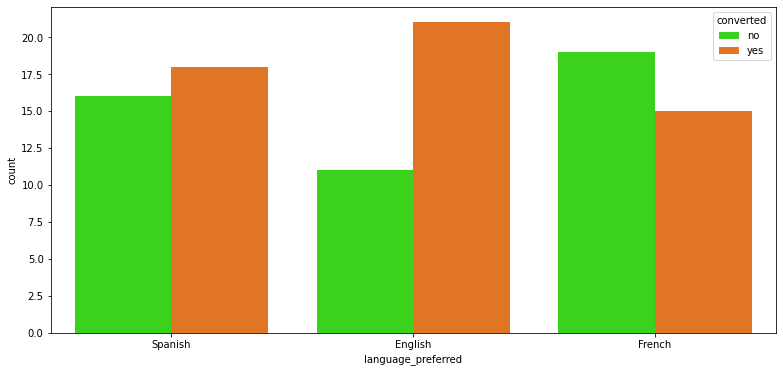

In [363]:
# We make the graph based on the 'conversion status' to compare between each other regardless the 'conversion rate'
plt.figure(figsize=(13,6))
sns.countplot(data = data, x='language_preferred', hue='converted', palette = 'gist_ncar');

#### Observations:
* According to the graph, the English version has the highest conversion in both landing pages version with 21 users, and the lowest numbers of users who did not subscribe with 11 in both versions (new/old), representing a difference of around 50% between each other.
* The second highest conversion corresponds to the Spanish landing page version with 18 users converted to subscribers, and the highest number of users who did not get subscribed with 19. In fact, is the only version where the number of users who did not get subscribed surpasses the numbers of users subscribed.
* The Spanish version is very similar in numbers between converted and not converted.
* There seems to be no definite pattern suggesting that the language determines the number of converts and non-converts. Although, What stands out the most is the negative relationship of the landing page in French.

### Visual analysis (based on 'Conversion Rate')

In [400]:
# if we want to know the conversion rate by language, we have to start creating a subset gathering 'language preferred'
# and 'converted' counting the user_id to see how many 'yes' and 'no' do we have.
table_by_language = data.groupby(['language_preferred', 'converted'])['user_id'].count().reset_index()
table_by_language.head(6)

,language_preferred,converted,user_id
0,English,no,11
1,English,yes,21
2,French,no,19
3,French,yes,15
4,Spanish,no,16
5,Spanish,yes,18


In [403]:
# Code to count n_sample converted (n_sample = yes + no) by languages
English_converted_sample = table_by_language[table_by_language['language_preferred'] == 'English']['user_id'].sum()
French_converted_sample = table_by_language[table_by_language['language_preferred'] == 'French']['user_id'].sum()
Spanish_converted_sample = table_by_language[table_by_language['language_preferred'] == 'Spanish']['user_id'].sum()
print('Converted n_sample for English =', English_converted_sample)
print('Converted n_sample for French =', French_converted_sample)
print('Converted n_sample for Spanish =', Spanish_converted_sample)

Converted n_sample for English = 32
Converted n_sample for French = 34
Converted n_sample for Spanish = 34


In [411]:
# Creating a tuple with the numbers of NO and YES per each landing page by languages
English_no, English_yes = table_by_language[table_by_language['language_preferred'] == 'English']['user_id']
French_no, French_yes = table_by_language[table_by_language['language_preferred'] == 'French']['user_id']
Spanish_no, Spanish_yes = table_by_language[table_by_language['language_preferred'] == 'Spanish']['user_id']
print('The numbers of NO converted and Yes, respectively for the English landing page are', (English_no, English_yes))
print('The numbers of NO converted and Yes, respectively for the French landing page are', (French_no, French_yes))
print('The numbers of NO converted and Yes, respectively for the Spanish landing page are', (Spanish_no, Spanish_yes))

The numbers of NO converted and Yes, respectively for the English landing page are (11, 21)
The numbers of NO converted and Yes, respectively for the French landing page are (19, 15)
The numbers of NO converted and Yes, respectively for the Spanish landing page are (16, 18)


In [422]:
# Calculating the conversion rate of the landing page by languages 
Conversion_rate_English = English_yes/English_converted_sample * 100
Conversion_rate_French = French_yes/French_converted_sample * 100
Conversion_rate_Spanish = Spanish_yes/Spanish_converted_sample * 100

print('The conversion rate for the landing page in English is the result of 21(yes)/32(total sample), which is =', round(Conversion_rate_English, 2),'%')
print('The conversion rate for the landing page in French is the result of 15(yes)/34(total sample), which is =', round(Conversion_rate_French, 2),'%')
print('The conversion rate for the landing page in Spanish is the result of 18(yes)/34(total sample), which is =', round(Conversion_rate_Spanish, 2),'%')

The conversion rate for the landing page in English is the result of 21(yes)/32(total sample), which is = 65.62 %
The conversion rate for the landing page in French is the result of 15(yes)/34(total sample), which is = 44.12 %
The conversion rate for the landing page in French is the result of 18(yes)/34(total sample), which is = 52.94 %


In [427]:
# Creating a list of list with the conversion rate per language for the landing page
table_lang_vs_conver_rate = [['English', Conversion_rate_English], ['French', Conversion_rate_French], ['Spanish', Conversion_rate_Spanish]]
table_lang_vs_conver_rate

[['English', 65.625],
 ['French', 44.11764705882353],
 ['Spanish', 52.94117647058824]]

In [428]:
# Creating a new dataframe gathering the language preferred and the conversion rate as the input for the graph
conversion_rate_data = pd.DataFrame(table_lang_vs_conver_rate,columns=['language_preferred', 'conversion_rate'])
conversion_rate_data

,language_preferred,conversion_rate
0,English,65.625000
1,French,44.117647
2,Spanish,52.941176


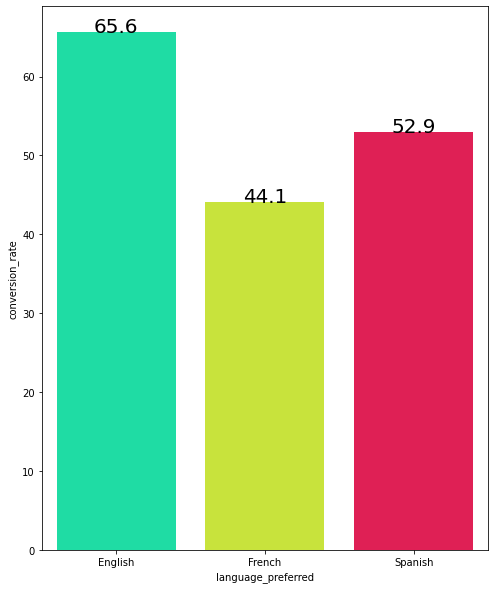

In [439]:
# Graph of the conversion rate associated with each language of the landing page 
plt.figure(figsize=(8,10))
h = sns.barplot(data=conversion_rate_data,
               x='language_preferred', 
               y='conversion_rate', 
               palette='gist_ncar',
               )
for index, row in conversion_rate_data.iterrows():
    h.text(row.name, row.conversion_rate, round(row.conversion_rate, 1), color='black', ha="center", size = 20)

### Akansha solution for this problem

In [73]:
# visual analysis of the dependency between conversion status and preferred language
pd.crosstab(data['converted'],data['language_preferred'])

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


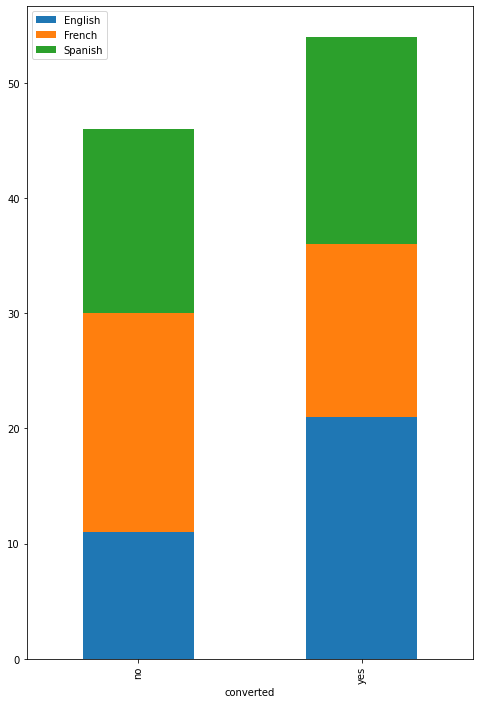

In [74]:
# visual analysis of the dependency between conversion status and preferred language
pd.crosstab(data['converted'],data['language_preferred']).plot(kind="bar", figsize=(8,12), stacked=True)
plt.legend()
plt.show()

#### Observations:
* According to the graph the conversion rate by language is higher on the English version of the landing page with a 65.6% of users converted to suscribers.
* The second highest conversion rate corresponds to the Spanish landing page version with a 52.9% of users converted to subscribers.
* The lowest conversion rate correspond to the French landing page with a 44.1% of users converted to subscribers.
* One of the most important concepts are the UX/UI so we should evaluate what is really working for each culture and what is not being efficient about gaining subscribers for ecah case.


### Step 1: Define the null and alternate hypotheses

Null hypothesis

>$H_0:$ The conversion rate is independent of the language of the landing page.

Alternate hypothesis

>$H_a:$ Conversion rate depends of the language of the landing page.

### Step 2: Select Appropriate test

* Here, we are testing de independence of two(2) categorical variables as: preferred language versus converted.
* We must implement the Chi-Square Test for Independence.

### Step 3: Decide the significance level

* As stated in the header we must consider a significance level of 0.05 for all tests.

### Step 4: Collect and prepare data

In [375]:
# we have to create a new table gathering the information related to the 'language preferred' and 'converted' columns as the input for the chi square function
# We can use the crosstab function
table_cont = pd.crosstab(data.language_preferred, data.converted)
table_cont

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [368]:
# importing the function chi-square
# calculating from the p-value from the input table (table_cont) and printing its values
from scipy.stats import chi2_contingency 
chi2, p_value, dof, exp_freq = chi2_contingency(table_cont)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


In [505]:
# printing the comparison of the p-value against the significance value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference
* We fail to reject the null hypothesis so we can say that the conversion rate is independent of the language used on the landing page.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

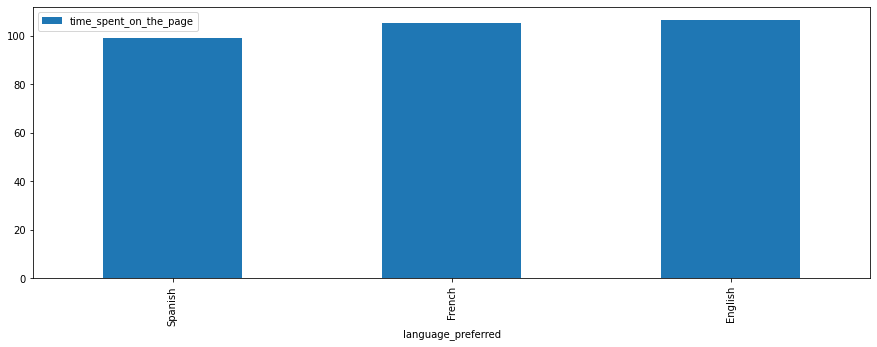

In [262]:
# Graph to visualize the total time spent just on the new page by languages
data_new_page.groupby(by=['language_preferred'])['time_spent_on_the_page'].sum().reset_index().sort_values(['time_spent_on_the_page']).plot(x='language_preferred',  y='time_spent_on_the_page', kind='bar',figsize=(15,5))
plt.show()

In [501]:
# Total time spent by the users on the English, French, and Spanish landing page
tst_new_eng = data_new_page[data_new_page['language_preferred'] == 'English']['time_spent_on_the_page'].sum()
tst_new_fre = data_new_page[data_new_page['language_preferred'] == 'French']['time_spent_on_the_page'].sum()
tst_new_spa = data_new_page[data_new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page'].sum()
print('The total time spent by the users on the English version of the landing page is', tst_new_eng, 'minutes')
print('The total time spent by the users on the French version of the landing page is', tst_new_fre, 'minutes')
print('The total time spent by the users on the Spanish version of the landing page is', tst_new_spa, 'minutes')

The total time spent by the users on the English version of the landing page is 106.62 minutes
The total time spent by the users on the French version of the landing page is 105.34 minutes
The total time spent by the users on the Spanish version of the landing page is 99.2 minutes


#### Observations:
* The total time spent by the users on the English version of the landing page is 106.62
* The total time spent by the users on the French version of the landing page is 105.34
* The total time spent by the users on the Spanish version of the landing page is 99.2
* Despite that the English version has the fewest number of users(32), they accumulate the greatest total amount of time browsing the website.

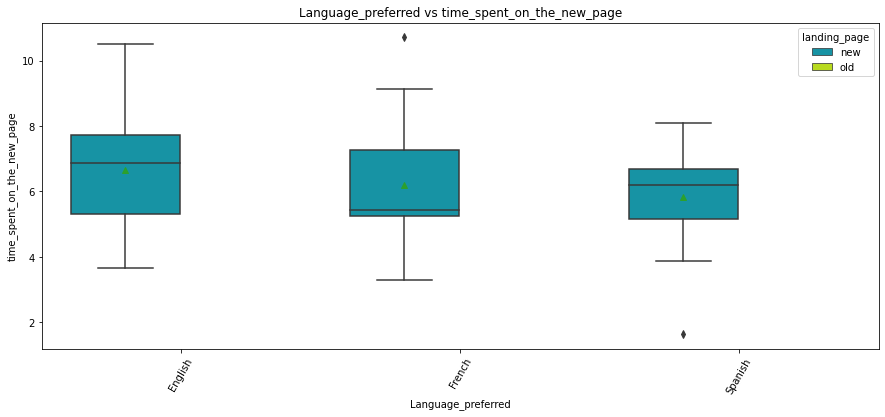

In [263]:
# Boxplot visualizin the language preferred vs time spent on the new page
plt.figure(figsize=(15,6))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = data_new_page, palette = 'nipy_spectral', hue = 'landing_page', showmeans=True)  
plt.xticks(rotation = 60)
plt.title("Language_preferred vs time_spent_on_the_new_page")
plt.ylabel("time_spent_on_the_new_page")
plt.xlabel("Language_preferred")
plt.show()

In [499]:
# Mean of time spent by the users on the English, French, and Spanish landing page
mean_new_eng = data_new_page[data_new_page['language_preferred'] == 'English']['time_spent_on_the_page'].mean()
mean_new_fre = data_new_page[data_new_page['language_preferred'] == 'French']['time_spent_on_the_page'].mean()
mean_new_spa = data_new_page[data_new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page'].mean()
print('The mean of time spent by the users on the English version of the landing page is', round(mean_new_eng, 4))
print('The mean of time spent by the users on the French version of the landing page is', round(mean_new_fre, 4))
print('The mean of time spent by the users on the Spanish version of the landing page is', round(mean_new_spa, 4))

The mean of time spent by the users on the English version of the landing page is 6.6637
The mean of time spent by the users on the French version of the landing page is 6.1965
The mean of time spent by the users on the Spanish version of the landing page is 5.8353


In [500]:
# Median of time spent by the users on the English, French, and Spanish landing page
med_new_eng = data_new_page[data_new_page['language_preferred'] == 'English']['time_spent_on_the_page'].median()
med_new_fre = data_new_page[data_new_page['language_preferred'] == 'French']['time_spent_on_the_page'].median()
med_new_spa = data_new_page[data_new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page'].median()
print('The median of time spent by the users on the English version of the landing page is', round(med_new_eng, 4))
print('The median of time spent by the users on the French version of the landing page is', round(med_new_fre, 4))
print('The median of time spent by the users on the Spanish version of the landing page is', round(med_new_spa, 4))

The median of time spent by the users on the English version of the landing page is 6.865
The median of time spent by the users on the French version of the landing page is 5.42
The median of time spent by the users on the Spanish version of the landing page is 6.2


In [503]:
# Minimun value of time spent by the users on the English, French, and Spanish landing page
min_new_eng = data_new_page[data_new_page['language_preferred'] == 'English']['time_spent_on_the_page'].min()
min_new_fre = data_new_page[data_new_page['language_preferred'] == 'French']['time_spent_on_the_page'].min()
min_new_spa = data_new_page[data_new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page'].min()
print('The minimun time spent by the users on the English version of the landing page is', round(min_new_eng, 4))
print('The minimun time spent by the users on the French version of the landing page is', round(min_new_fre, 4))
print('The minimun time spent by the users on the Spanish version of the landing page is', round(min_new_spa, 4))

The minimun time spent by the users on the English version of the landing page is 3.65
The minimun time spent by the users on the French version of the landing page is 3.3
The minimun time spent by the users on the Spanish version of the landing page is 1.65


In [504]:
# Maximun value of time spent by the users on the English, French, and Spanish landing page
max_new_eng = data_new_page[data_new_page['language_preferred'] == 'English']['time_spent_on_the_page'].max()
max_new_fre = data_new_page[data_new_page['language_preferred'] == 'French']['time_spent_on_the_page'].max()
max_new_spa = data_new_page[data_new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page'].max()
print('The maximun time spent by the users on the English version of the landing page is', round(max_new_eng, 4))
print('The maximun time spent by the users on the French version of the landing page is', round(max_new_fre, 4))
print('The maximun time spent by the users on the Spanish version of the landing page is', round(max_new_spa, 4))

The maximun time spent by the users on the English version of the landing page is 10.5
The maximun time spent by the users on the French version of the landing page is 10.71
The maximun time spent by the users on the Spanish version of the landing page is 8.08


#### Observations:
* The graph evaluates the language preferred vs the time spent on the NEW page. The mean of the time spent by the users of the English version represents the higher value with 6.66 minutes, followed by the French version with 6.19 minutes, and the lowest mean of the time spent corresponds to the Spanish version with 5.83 minutes.
* The maximun values is an outlier of the French version with 10.71 minutes, and the minimun values corresponds to the French version as well with 3.3 minutes.
* The English's version has the higher IQR, and the lower IQR corresponds to the Spanish version. The median is different for all the language's version. The mean is close to the median on the English and Spanish's version.

### Step 1: Define the null and alternate hypotheses

#### Writing the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means time spent on the new landing  respectively.

Null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

Alternative hypothesis

>$H_a: $ At least one mean of the time spent in one of the landing page in a specific language is different from the rest.

### Step 2: Select Appropriate test

* Here, we have to solve a problem related to three(3) population means. Additionally, we have to run the test to validate the initial assumptions of normality and the homogeneity of variance for the three groups.

* We have bivariate data, one discrete and one continuos (time_spent_on_the_page)

* Shapiro-Wilk’s test must be applied to validate the normality assumption.

* Levene test must be applied to validate the homogeneity of variance for the three variables or groups.


### Shapiro-Wilk’s test

Null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

Alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [264]:
# Lets validate the assumption of the normality in the distribution
# importing the required function
from scipy.stats import shapiro
# finding the p-value
w, p_value = shapiro(data_new_page['time_spent_on_the_page']) 
print('The p-value is', round(p_value, 6))

The p-value is 0.804002


In [377]:
# printing the comparison of the p-value against the significance value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


* Since p-value of the Shapiro-Wilk's test is greater than the 5% significance level, we fail to reject the null hypothesis so we can say that the time spent on the new page follows a normal distribution.

### Levene’s test

Null hypothesis

>$H_0$: All the population variances are equal

Alternative hypothesis

>$H_a$: At least one of the variances is different from the rest

In [376]:
#We have to confirm the Homogeneity of the Variances
#importing the function for the Levene test
from scipy.stats import levene
statistic, p_value = levene(data_new_page[data_new_page['language_preferred']=="English"]['time_spent_on_the_page'], 
                             data_new_page[data_new_page['language_preferred']=="French"]['time_spent_on_the_page'], 
                             data_new_page[data_new_page['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# printing the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [506]:
# printing the comparison of the p-value against the significance value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


* Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances so we can say that all the variances are equals.

### Validation of the initial assumptions

* Through the use of Shapiro-Wilk’s test we could confirm that the populations are normally distributed.
* The problem described that the samples are independent and were picked as a simple random samples. 
* Through the use of Levene's test we could confirm the homogeneity of the variances so population variances are equal

### Step 4: Collect and prepare data to calculate the p-value

In [379]:
# We have to create 3 new subsets with the time spent on the new page by English, French, and Spanish language users 
time_spent_English_newpage = data_new_page[data_new_page['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French_newpage = data_new_page[data_new_page['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish_newpage = data_new_page[data_new_page['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [380]:
# Importing the function required to run the Oneway ANOVA F-test
from scipy.stats import f_oneway 

# Calculating the p-value with the new variables created (time_spent_English_newpage, time_spent_French_newpage, time_spent_Spanish_newpage) 
test_stat, p_value = f_oneway(time_spent_English_newpage, time_spent_French_newpage, time_spent_Spanish_newpage)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [381]:
# printing the comparison of the p-value against the significance value
if p_value < 0.05:
    print(f'Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


In [391]:
# Evaluating the mean of the time spent on the new page_English version
round(time_spent_English_newpage.mean(), 4)

6.6637

In [392]:
# Evaluating the mean of the time spent on the new page_French version
round(time_spent_French_newpage.mean(), 4)

6.1965

In [393]:
# Evaluating the mean of the time spent on the new page_French version
round(time_spent_Spanish_newpage.mean(), 4)

5.8353

### Step 7:  Draw inference

* We fail to reject the null hypothesis. Hence, we can say that the mean time spent in the new landing page by the differents languages(English, French and Spanish) version are very close to each other so we can assume that they are equal. 

## Conclusion and Business Recommendations

* We worked on a A/B test. The 'control' group kept the original conditions (old landing page), and the 'treatment' group was tested through the use of the 'new' landing page. 
* In general 54% of the users got subscribed and 46% did not get subscribed, without considering any other specific conditions.
* The language preferences within the users was practically the same for the three languages, with 34% for the Spanish and French, and 32% for the English users.
* Since the statistical analysis of the time spent on the landing page suggested a symmetrical distribution around the median and the mean, we could use the Central Limit Theorem for the normal distribution characteristics to formulate hypothesis test and drive useful conclusions on this project.
* We can observe a correlation between the time spent and the version of the landing page(old/new). The mean navigation time of the users in the new landing (6.22 minutes) page is 27.17% greater than The mean navigation time (4.53 minutes) of the users in the old landing page.
* the main differences between the old and the new version regarding the time spent for the users in general are:
* 1.-Old version has the higher dispersion from the mean
* 2.-Old version has the lower minimun values of navigation
* 3.-Old version has a higher IQR
* 4.-Old version has the greatest standard deviation (2.58 minutes)
* We found enough statistical evidence to reject the null hyphotesis of the question number 2, and say that the mean of the time spent on the new landing page is greater than the mean of the time spent on the old landing page.
* The new version of the landing page shows a greater engagement according to the total and mean navigation time spent by the users than the old version. This behavior is possibly associated with the improvement in the new version of two fundamental concepts within the world of websites and APPs, such as the user experience and the user interface (UX / UI).
* We found enough statistical evidence to reject the null Hypothesis of the problem 3, and say that the proportion of conversion rate of the new landing page is greater than the old landing page.
* The conversion rate for the new landing page is greater than the conversion rate of the old landing page by 24%.
* The conversion rate for the new landing page is 66%.
* The conversion rate for the old landing page is 42%.
* The process or the consumer journey inside the new landing page is evidently more effective to get more subscribers than the old landing page.
* We fail to reject the null hypothesis of the problem 4, so we can say that the conversion rate is independent of the language used on the landing page.
* The mean of the time spent by the users who get subscribed is greater than the mean of the time spent by the users who did not get subscribed in all the three languages.
* English version has the highest conversion in both landing pages version with 21 users, and the lowest numbers of users who did not subscribe with 11 in both versions (new/old), representing a difference of around 50% between each other.
* The second highest conversion corresponds to the Spanish landing page version with 18 users converted to subscribers, and the highest number of users who did not get subscribed with 19. In fact, is the only version where the number of users who did not get subscribed surpasses the numbers of users subscribed.
* The Spanish version is very similar in numbers between converted and not converted.
* There seems to be no definite pattern suggesting that the language determines the number of converts and non-converts. 
* The conversion rate by language is higher on the English version of the landing page with a 65.6% of users converted to suscribers.
* The second highest conversion rate corresponds to the Spanish landing page version with a 52.9% of users converted to subscribers.
* The lowest conversion rate correspond to the French landing page with a 44.1% of users converted to subscribers. 
* We could confirm in problem 5, through the use of Shapiro-Wilk’s test, that the populations of the time spent on the new page are normally distributed.
* Samples in problem 5 were independent and were picked as a simple random samples. 
* Through the use of Levene's test we could confirm the homogeneity of the variances so population variances are equal. We fail to reject the null hypothesis of homogeneity of variances so we could say that all the variances are equals.
* After validating all the initials assumption, and running the oneway ANOVA test, we fail to reject the null hypothesis. Hence, we can say that the mean time spent in the new landing page by the different language (English, French and Spanish) versions are very close to each other so we can assume that they are equal.  
* We can assume that the browsing time is linked to an engagement factor, associated with the improvement of the user experience and user interface (UX/UI). in turn, it translates into a higher conversion rate. So, it is advisable to study the changes in these factors that motivated users to stay longer on the new landing page. 
* The highest conversion rate corresponds to the English language. We would have to evaluate if the pages in French and Spanish are literal translations of the English page or if they are really customized for each culture. Since, this could affect the browsing time, due to loss of interest or lack of engagement through the language or keywords of each culture.
* Work close with professional people with domain knowledge in UX/UI design, and marketing (the consumer journey loop), specifically, in the identification and adaptation of these critical factors for each of the landing page languages to boost and increase browsing time and subscriber conversion, especially in the French and Spanish versions of the landing page..
* At least in this population the new landing page is giving results, showing a higher navigation time within the page anda greater conversion rate, so they the team could think about permanently migrating and discarding the old version.






